# Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Импорт библиотек и загрузка данных

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

In [ ]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [ ]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Оставим только данные по городу Бангалор

In [ ]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [ ]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [ ]:
ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


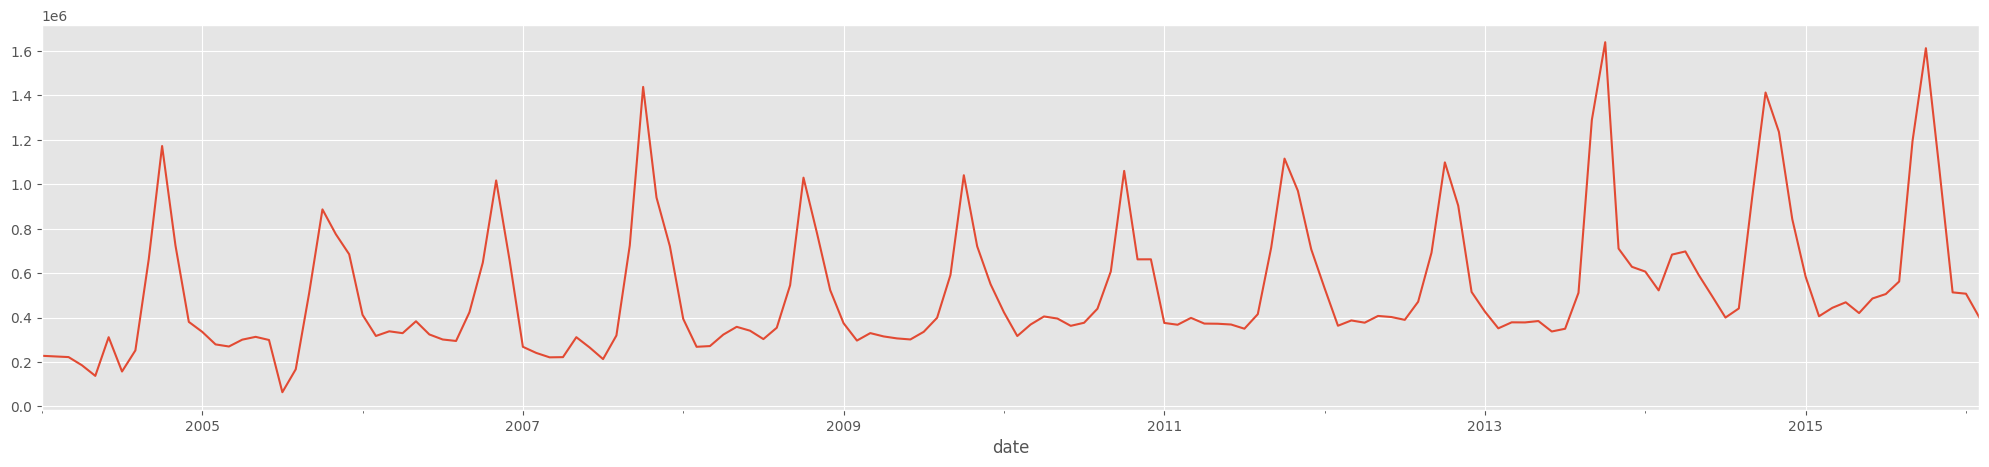

In [ ]:
ts.quantity.plot(figsize=(25,5));

## Обучение адаптивных моделей

Разбейте данные (quantity) на train и test.

* train - первые 85% данных

* test - следующие 15% данных

Проверьте, что в тест попало 22 измерения.

In [ ]:
# ваш код здесь
iindex = int(ts.shape[0] * 0.85)

train = ts.iloc[:iindex]
test = ts.iloc[iindex:]
print(test.shape[0] == 22)

True


Обучите следующие модели на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Простое экспоненциальное сглаживание с автоматически подбираемым $\alpha$

2) Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров

3) Аддитивную модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

In [ ]:
# ваш код здесь

# Простое экспоненциальное сглаживание с автоматически подбираемым  𝛼

simple_fit = SimpleExpSmoothing(train, initialization_method='heuristic').fit()
simple_forecast = simple_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


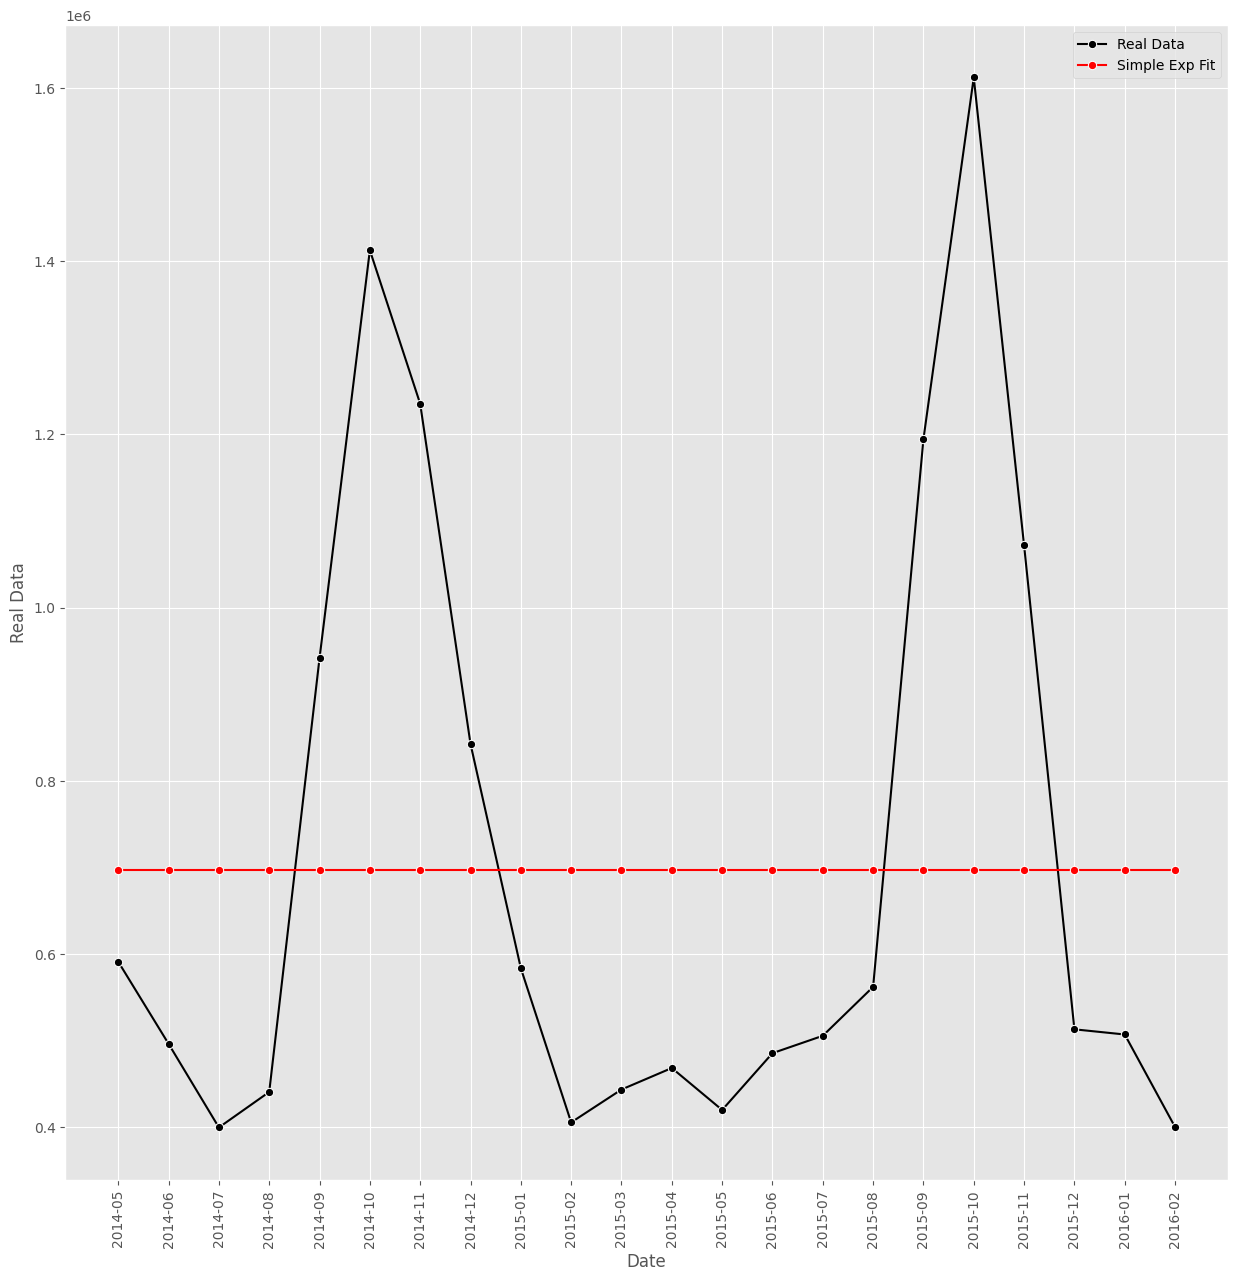

In [ ]:
data = pd.DataFrame({'Date': test['quantity'].index.astype(str), 'Real Data': test['quantity'], 'Simple Exp Fit': simple_forecast.values})
sns.lineplot(x='Date', y='Real Data', data=data, marker='o', color='black', label='Real Data')
sns.lineplot(x='Date', y='Simple Exp Fit', data=data, marker='o', color='red', label='Simple Exp Fit')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Модель Хольта (аддитивная) с автоматическим подбором гиперпараметров

holt_fit = Holt(train, initialization_method='estimated').fit()
holt_forecast = holt_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


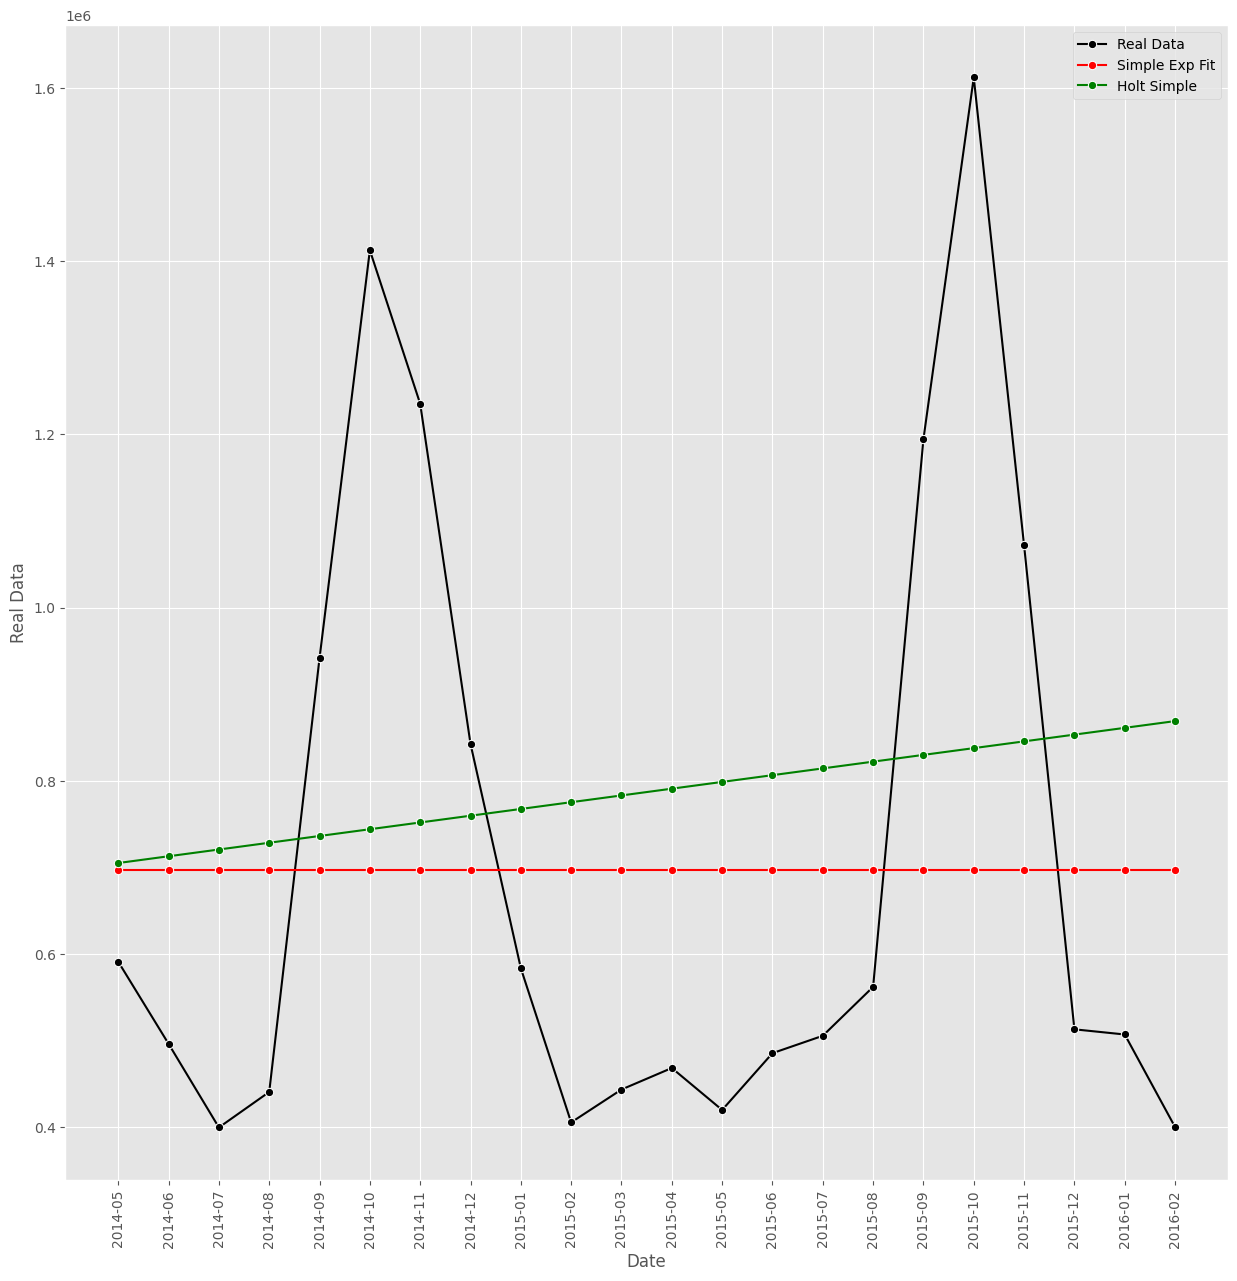

In [ ]:
data = pd.DataFrame({'Date': test['quantity'].index.astype(str), 'Real Data': test['quantity'], 'Simple Exp Fit': simple_forecast.values, 'Holt Simple': holt_forecast.values})
sns.lineplot(x='Date', y='Real Data', data=data, marker='o', color='black', label='Real Data')
sns.lineplot(x='Date', y='Simple Exp Fit', data=data, marker='o', color='red', label='Simple Exp Fit')
sns.lineplot(x='Date', y='Holt Simple', data=data, marker='o', color='green', label='Holt Simple')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Аддитивная модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом
holt_dl_fit = Holt(train, damped_trend=True, initialization_method='estimated').fit()
holt_dl_forecast = holt_dl_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


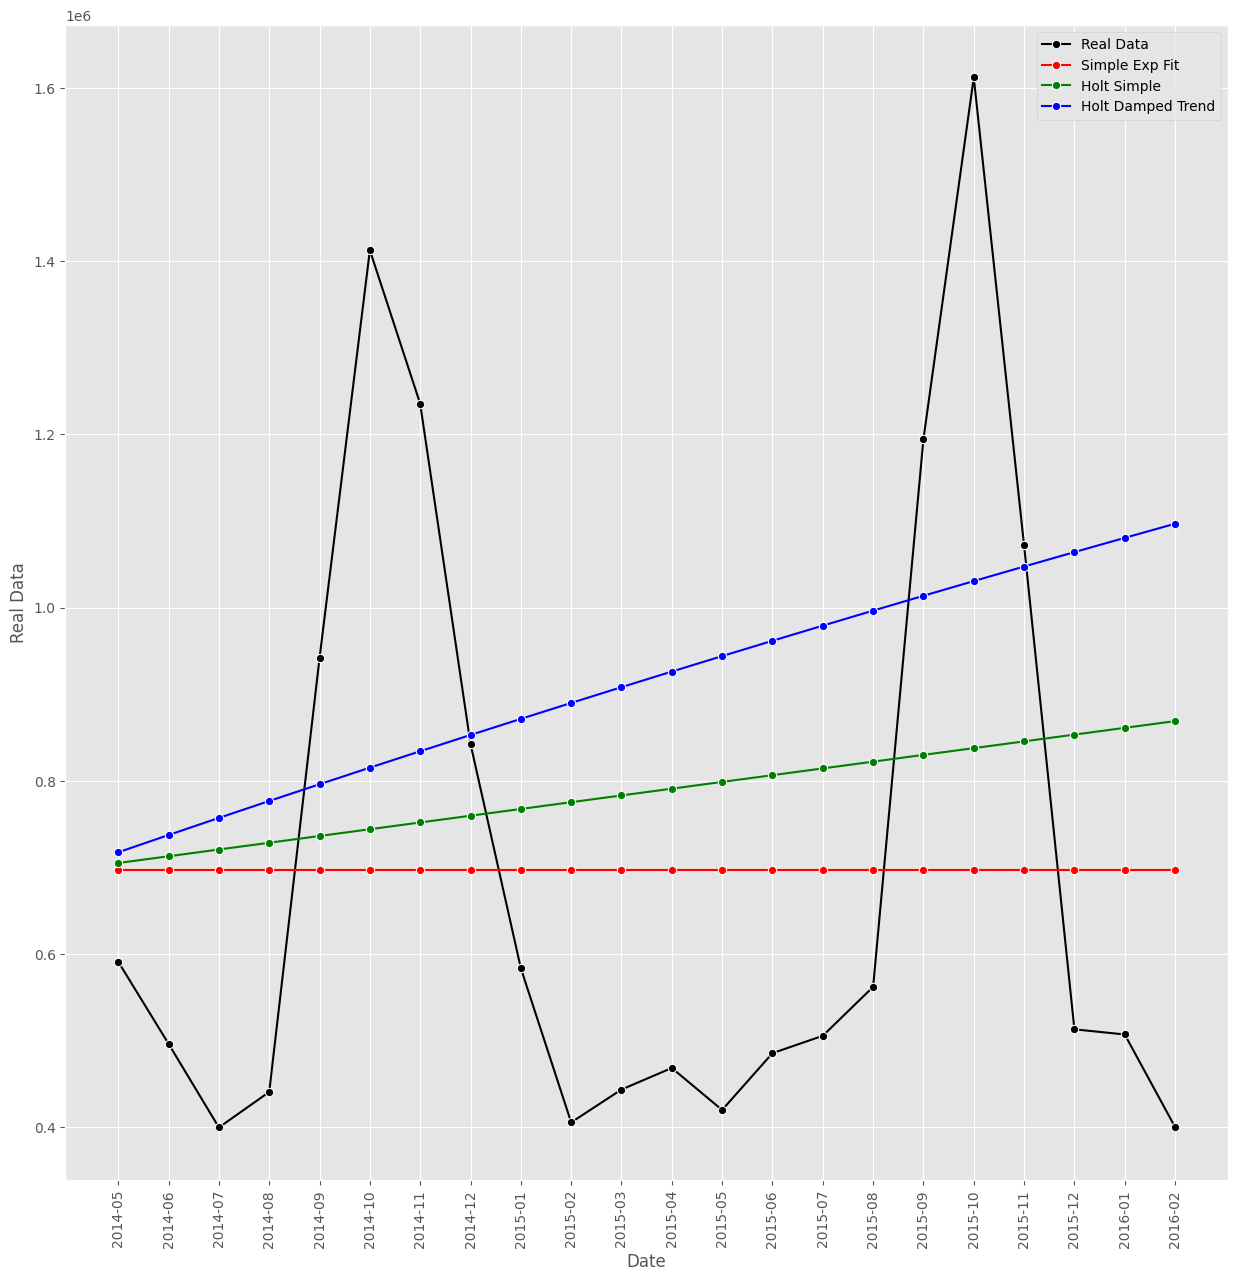

In [ ]:
data = pd.DataFrame({'Date': test['quantity'].index.astype(str),
                     'Real Data': test['quantity'],
                     'Simple Exp Fit': simple_forecast.values,
                     'Holt Simple': holt_forecast.values,
                     'Holt Damped Trend': holt_dl_forecast.values})
sns.lineplot(x='Date', y='Real Data', data=data, marker='o', color='black', label='Real Data')
sns.lineplot(x='Date', y='Simple Exp Fit', data=data, marker='o', color='red', label='Simple Exp Fit')
sns.lineplot(x='Date', y='Holt Simple', data=data, marker='o', color='green', label='Holt Simple')
sns.lineplot(x='Date', y='Holt Damped Trend', data=data, marker='o', color='blue', label='Holt Damped Trend')
plt.xticks(rotation=90)
plt.show()


In [ ]:
print('r2 for simple = %.4f' % r2_score(test['quantity'], simple_forecast.values))
print('r2 for holt = %.4f' % r2_score(test['quantity'], holt_forecast.values))
print('r2 for holt with dl = %.4f' % r2_score(test['quantity'], holt_dl_forecast.values))

r2 for simple = -0.0006
r2 for holt = -0.0554
r2 for holt with dl = -0.3983


## Quiz

У какой из трех обученных моделей самый быстро возрастающий тренд?

Обучите четыре модели Хольта-Винтерса на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

3) Модель с аддитивными трендом и сезонностью и затухающим трендом

4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

In [ ]:
# ваш код здесь
fit1 = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    initialization_method='estimated',
    use_boxcox=True
).fit()
fit1_forecast = fit1.forecast(len(test))

In [ ]:
fit2 = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='mul',
    initialization_method='estimated',
    use_boxcox=True
).fit()
fit2_forecast = fit2.forecast(len(test))

In [ ]:
fit3 = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    damped_trend=True,
    initialization_method='estimated',
    use_boxcox=True
).fit()
fit3_forecast = fit3.forecast(len(test))

In [ ]:
fit4 = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='mul',
    damped_trend=True,
    initialization_method='estimated',
    use_boxcox=True
).fit()
fit4_forecast = fit4.forecast(len(test))

In [ ]:
fit1_forecast = fit1.forecast(len(test))
fit2_forecast = fit2.forecast(len(test))
fit3_forecast = fit3.forecast(len(test))
fit4_forecast = fit4.forecast(len(test))

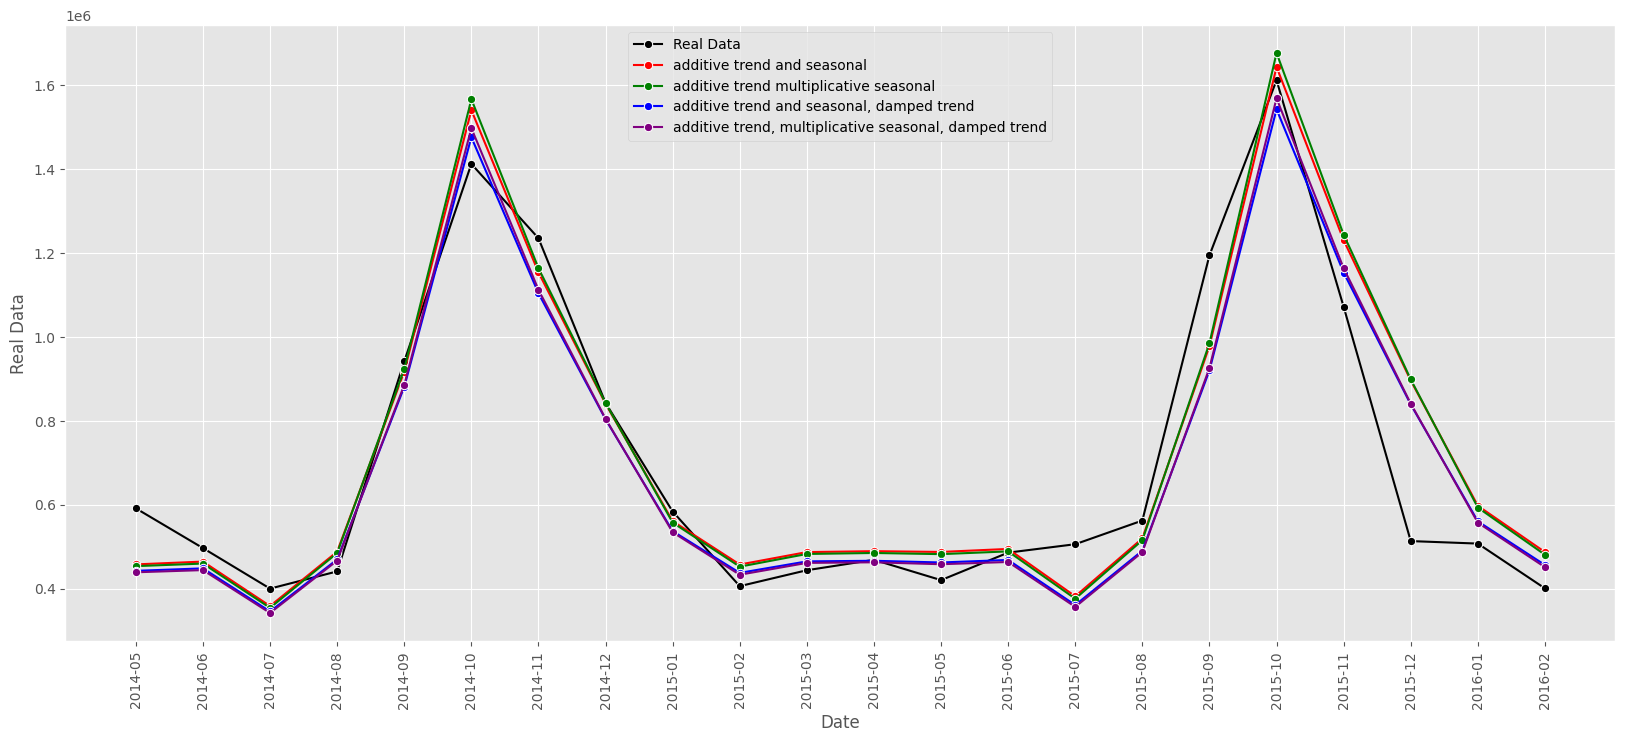

In [ ]:
data = pd.DataFrame({'Date': test.index.astype(str),
                     'Real Data': test['quantity'],
                     'additive trend and seasonal': fit1_forecast.values,
                     'additive trend multiplicative seasonal': fit2_forecast.values,
                     'additive trend and seasonal, damped trend': fit3_forecast.values,
                     'additive trend, multiplicative seasonal, damped trend': fit4_forecast.values})

plt.figure(figsize=(20, 8))
sns.lineplot(x='Date', y='Real Data', data=data, marker='o', color='black', label='Real Data')
sns.lineplot(x='Date', y='additive trend and seasonal', data=data, marker='o', color='red', label='additive trend and seasonal')
sns.lineplot(x='Date', y='additive trend multiplicative seasonal', data=data, marker='o', color='green', label='additive trend multiplicative seasonal')
sns.lineplot(x='Date', y='additive trend and seasonal, damped trend', data=data, marker='o', color='blue', label='additive trend and seasonal, damped trend')
sns.lineplot(x='Date', y='additive trend, multiplicative seasonal, damped trend', data=data, marker='o', color='purple', label='additive trend, multiplicative seasonal, damped trend')
plt.xticks(rotation=90)
plt.show()

Вычислите RMSE (корень из среднеквадратичной ошибки) на тестовых данных для каждого из четырех прогнозов.

In [ ]:
from sklearn.metrics import mean_squared_error

# ваш код здесь

## Quiz

Какая модель справилась лучше остальных?

## Quiz

Чему равно значение RMSE для лучшей модели? Ответ округлите до целого числа.

В предыдущем домашнем задании мы работали с логарифмированным рядом и вычисляли RMSE для него.

Вычислите ошибки последних четырех моделей для логарифмов правильных ответов и прогнозов.

In [ ]:
# ваш код здесь

## Quiz

Какое семейство моделей лучше справилось с решением задачи:
SARIMAX или модели Хольта-Винтерса?

## Опциональное задание (без проверки)

Воспользуйтесь экспоненциальными моделями из библиотеки Orbit для получения прогноза в данной задаче.

In [ ]:
# ваш код здесь